In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

In [34]:
# Sample DataFrame
database = pd.read_csv('EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')
print(database.shape)
database.head()

(220740, 117)


,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [3]:
# Create a list with existing columns on database
column_list = database.columns.tolist()

print(column_list)

['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3

In [4]:
# Dropping columns
columns_to_drop = ['COUNTYFP','STATEFP', 'CSA', 'CSA_Name', 'OBJECTID', 'GEOID10', 'GEOID20', 'TRACTCE',
                   'BLKGRPCE', 'Ac_Water', 'Ac_Land'
                   , 'TotPop', 'CountHU', 'HH', 'Pct_AO0','Pct_AO1','Pct_AO2p','R_PCTLOWWAGE'
                   ,'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off'
                   , 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk'
                   , 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1C5_RET', 'D1C5_OFF'
                   , 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC'
                   , 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH'
                   , 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1'
                   , 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX'
                   , 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4'
                   , 'D4B025', 'D4B050', 'D4C', 'D4D', 'D4E', 'D5AE', 'D5BR', 'D5BE', 'D5CR', 'D5CRI'
                   , 'D5CE', 'D5CEI', 'D5DR', 'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked'
                   , 'D3B_Ranked', 'D4A_Ranked', 'Shape_Length', 'Shape_Area']

database = database.drop(columns=columns_to_drop)

database.head()

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,AutoOwn1,...,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd
0,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,73.595028,0.549,69,39,...,412,99,122,191,66,16.332625,0.896800,362.10,433601,14.000000
1,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,119.214200,0.466,0,168,...,395,76,107,212,25,5.955666,0.209707,718.84,386504,10.833333
2,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,26.367050,0.811,19,143,...,463,136,189,138,0,27.951553,0.000000,398.31,404573,8.333333
3,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,119.060687,0.638,0,43,...,431,60,69,302,253,7.592767,2.124967,386.24,423099,15.666667
4,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,169.927211,148.742920,0.506,5,67,...,579,91,84,404,32,6.373413,0.215136,638.37,335700,10.166667


In [5]:
new_column_list = database.columns.tolist()

print(new_column_list)

['CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'Ac_Total', 'Ac_Unpr', 'P_WrkAge', 'AutoOwn0', 'AutoOwn1', 'AutoOwn2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'TotEmp', 'D1B', 'D1C', 'D4A', 'D5AR', 'NatWalkInd']


In [6]:
# Specify the columns on which you want to check for missing values
columns_to_check = ['CBSA', 'CBSA_Name']

# Drop rows with missing values in the specified columns
database_cleaned = database.dropna(subset=columns_to_check)

database_cleaned

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,AutoOwn1,...,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd
0,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,73.595028,0.549,69,39,...,412,99,122,191,66,16.332625,0.896800,362.10,433601,14.000000
1,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,119.214200,0.466,0,168,...,395,76,107,212,25,5.955666,0.209707,718.84,386504,10.833333
2,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,26.367050,0.811,19,143,...,463,136,189,138,0,27.951553,0.000000,398.31,404573,8.333333
3,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,119.060687,0.638,0,43,...,431,60,69,302,253,7.592767,2.124967,386.24,423099,15.666667
4,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,169.927211,148.742920,0.506,5,67,...,579,91,84,404,32,6.373413,0.215136,638.37,335700,10.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220646,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,34.442281,34.442281,0.548,39,158,...,0,0,0,0,0,21.891698,0.000000,-99999.00,0,6.666667
220647,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,27.042871,27.042871,0.524,44,90,...,0,0,0,0,0,31.801357,0.000000,-99999.00,0,6.333333
220648,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,49.273470,49.273470,0.653,37,131,...,0,0,0,0,0,15.748840,0.000000,-99999.00,0,6.000000
220649,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,123.296228,111.259740,0.586,0,137,...,0,0,0,0,0,3.235672,0.000000,-99999.00,0,5.333333


In [7]:
# Drop columns with value = 0
columns_check_zero = ['CBSA_EMP','CBSA_WRK']

database_cleaned = database_cleaned[(database_cleaned[columns_to_check] != 0).all(axis=1)]

database_cleaned

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,AutoOwn1,...,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd
0,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,73.595028,0.549,69,39,...,412,99,122,191,66,16.332625,0.896800,362.10,433601,14.000000
1,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,119.214200,0.466,0,168,...,395,76,107,212,25,5.955666,0.209707,718.84,386504,10.833333
2,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,26.367050,0.811,19,143,...,463,136,189,138,0,27.951553,0.000000,398.31,404573,8.333333
3,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,119.060687,0.638,0,43,...,431,60,69,302,253,7.592767,2.124967,386.24,423099,15.666667
4,19100.0,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,169.927211,148.742920,0.506,5,67,...,579,91,84,404,32,6.373413,0.215136,638.37,335700,10.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220646,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,34.442281,34.442281,0.548,39,158,...,0,0,0,0,0,21.891698,0.000000,-99999.00,0,6.666667
220647,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,27.042871,27.042871,0.524,44,90,...,0,0,0,0,0,31.801357,0.000000,-99999.00,0,6.333333
220648,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,49.273470,49.273470,0.653,37,131,...,0,0,0,0,0,15.748840,0.000000,-99999.00,0,6.000000
220649,41980.0,"San Juan-Bayamón-Caguas, PR",2142392,0,0,123.296228,111.259740,0.586,0,137,...,0,0,0,0,0,3.235672,0.000000,-99999.00,0,5.333333


In [8]:
# Filter database to only show results from NY state (NY)
# Specify the column and the value you want to filter
column_to_filter = 'CBSA_Name'
value_to_match = ', NY'

# Use boolean indexing to filter the DataFrame
filtered_database = database_cleaned[database_cleaned[column_to_filter].str.contains(value_to_match, na=False)]

filtered_database = filtered_database.reset_index(drop=True)
filtered_database

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,AutoOwn1,...,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,51.444490,50.313740,0.705,26,94,...,385,84,120,181,11,26.791886,0.218628,962.92,661739,10.500000
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,1025.230008,960.425575,0.560,12,120,...,932,151,128,653,282,1.632610,0.293620,944.15,140212,9.500000
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,1423.857411,1252.374073,0.557,13,171,...,855,165,217,473,4012,1.484381,3.203516,839.54,158876,13.000000
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,485.497632,433.369860,0.630,0,202,...,1563,280,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,148.564674,147.595085,0.626,0,50,...,498,92,91,315,194,4.674952,1.314407,968.29,278458,14.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,7356.423984,6764.490215,0.591,0,194,...,434,105,140,189,190,0.134970,0.028088,-99999.00,4940,7.000000
19822,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,7941.309931,7254.276913,0.677,0,102,...,325,71,112,142,32,0.177275,0.004411,-99999.00,249,3.833333
19823,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,5142.746758,4844.003689,0.573,47,154,...,782,190,270,322,62,0.315029,0.012799,-99999.00,690,5.666667
19824,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,2440.629186,2323.255450,0.629,16,174,...,805,178,296,331,45,0.796296,0.019369,-99999.00,992,3.833333


In [9]:
# Assuming 'your_dataset' is your DataFrame
filtered_database['Perc_Local_wrk'] = (filtered_database['CBSA_WRK'] / filtered_database['CBSA_POP'] * 100).round(2)

# Find the index of the 'CBSA_WRK' column
wrk_column_index = filtered_database.columns.get_loc('CBSA_WRK')

# Insert the 'Perc_Local_wrk' column after the 'CBSA_WRK' column
filtered_database.insert(wrk_column_index + 1, 'Perc_Local_wrk', filtered_database.pop('Perc_Local_wrk'))

filtered_database

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,...,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,51.444490,50.313740,0.705,26,...,385,84,120,181,11,26.791886,0.218628,962.92,661739,10.500000
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,1025.230008,960.425575,0.560,12,...,932,151,128,653,282,1.632610,0.293620,944.15,140212,9.500000
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,1423.857411,1252.374073,0.557,13,...,855,165,217,473,4012,1.484381,3.203516,839.54,158876,13.000000
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,485.497632,433.369860,0.630,0,...,1563,280,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,148.564674,147.595085,0.626,0,...,498,92,91,315,194,4.674952,1.314407,968.29,278458,14.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,7356.423984,6764.490215,0.591,0,...,434,105,140,189,190,0.134970,0.028088,-99999.00,4940,7.000000
19822,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,7941.309931,7254.276913,0.677,0,...,325,71,112,142,32,0.177275,0.004411,-99999.00,249,3.833333
19823,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,5142.746758,4844.003689,0.573,47,...,782,190,270,322,62,0.315029,0.012799,-99999.00,690,5.666667
19824,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,2440.629186,2323.255450,0.629,16,...,805,178,296,331,45,0.796296,0.019369,-99999.00,992,3.833333


In [10]:
# Getting unique values in the 'Perc_Local_wrk' column as list
unique_Perc_Local_wrk =[filtered_database['Perc_Local_wrk'].unique()]

print(f"Number of unique Perc_Local_wrk: {filtered_database['Perc_Local_wrk'].nunique()}")

# Display unique values
unique_Perc_Local_wrk

Number of unique Perc_Local_wrk: 27


[array([46.31, 40.23, 46.48, 42.72, 47.01, 44.11, 47.67, 44.27, 39.79,
        40.82, 47.55, 44.54, 42.08, 35.68, 40.27, 43.39, 40.39, 44.29,
        43.02, 42.2 , 32.16, 33.06, 39.44, 38.48, 44.83, 44.79, 39.12])]

In [11]:
# Getting unique values in the 'CBSA_Name' column as list
unique_values =[filtered_database['CBSA_Name'].unique()]

print(f"Number of unique CBSA Names: {filtered_database['CBSA_Name'].nunique()}")

# Display unique values
unique_values

Number of unique CBSA Names: 27


[array(['New York-Newark-Jersey City, NY-NJ-PA', 'Elmira, NY',
        'Buffalo-Cheektowaga, NY', 'Binghamton, NY', 'Rochester, NY',
        'Gloversville, NY', 'Albany-Schenectady-Troy, NY',
        'Glens Falls, NY', 'Olean, NY', 'Oneonta, NY', 'Batavia, NY',
        'Poughkeepsie-Newburgh-Middletown, NY', 'Cortland, NY',
        'Malone, NY', 'Amsterdam, NY', 'Utica-Rome, NY', 'Corning, NY',
        'Syracuse, NY', 'Kingston, NY', 'Plattsburgh, NY',
        'Watertown-Fort Drum, NY', 'Ogdensburg-Massena, NY', 'Ithaca, NY',
        'Seneca Falls, NY', 'Auburn, NY', 'Hudson, NY',
        'Jamestown-Dunkirk-Fredonia, NY'], dtype=object)]

In [12]:
# Function to categorize levels of walkability based on 'NatWalkInd' values and criteria
def categorize_walkability(value):
    if 1.0 <= value <= 5.75:
        return 'least walkable'
    elif 5.76 <= value <= 10.5:
        return 'below average walkable'
    elif 10.51 <= value <= 15.25:
        return 'above average walkable'
    elif 15.26 <= value <= 20.0:
        return 'most walkable'
    else:
        return 'unknown walkability'

# Apply the function to create a new column 'levels of walkability'
filtered_database['levels of walkability'] = filtered_database['NatWalkInd'].apply(categorize_walkability)

# Display the updated DataFrame
filtered_database

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Ac_Total,Ac_Unpr,P_WrkAge,AutoOwn0,...,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd,levels of walkability
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,51.444490,50.313740,0.705,26,...,84,120,181,11,26.791886,0.218628,962.92,661739,10.500000,below average walkable
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,1025.230008,960.425575,0.560,12,...,151,128,653,282,1.632610,0.293620,944.15,140212,9.500000,below average walkable
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,1423.857411,1252.374073,0.557,13,...,165,217,473,4012,1.484381,3.203516,839.54,158876,13.000000,above average walkable
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,485.497632,433.369860,0.630,0,...,280,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333,below average walkable
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,148.564674,147.595085,0.626,0,...,92,91,315,194,4.674952,1.314407,968.29,278458,14.666667,above average walkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,7356.423984,6764.490215,0.591,0,...,105,140,189,190,0.134970,0.028088,-99999.00,4940,7.000000,below average walkable
19822,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,7941.309931,7254.276913,0.677,0,...,71,112,142,32,0.177275,0.004411,-99999.00,249,3.833333,least walkable
19823,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,5142.746758,4844.003689,0.573,47,...,190,270,322,62,0.315029,0.012799,-99999.00,690,5.666667,least walkable
19824,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,2440.629186,2323.255450,0.629,16,...,178,296,331,45,0.796296,0.019369,-99999.00,992,3.833333,least walkable


In [13]:
# Define a scaling and binning function
def scale_and_bin(column, bins, labels):
    min_value = column.min()
    max_value = column.max()
    scaled_column = (column - min_value) / (max_value - min_value)
    return pd.cut(scaled_column, bins=bins, labels=labels, include_lowest=True)

# Define bins and labels
bins = [0.0, 0.25, 0.50, 0.75, 1]
labels = ['Bottom 25%', '25%-50%', '50%-75%', '75%-100%']

# Apply the scaling and binning function to both columns
scaled_column = scale_and_bin(filtered_database['Perc_Local_wrk'], bins, labels)

# Drop the existing 'Local_Workers_%_Range' column if it already exists
if 'Local_Workers_%_Range' in filtered_database.columns:
    filtered_database.drop('Local_Workers_%_Range', axis=1, inplace=True)

# Insert the 'Local Workes % Range' column next to 'Perc_Local_wrk'
filtered_database.insert(filtered_database.columns.get_loc('Perc_Local_wrk') + 1, 'Local_Workers_%_Range', scaled_column)

test_unique=filtered_database['Local_Workers_%_Range'].unique()
test_unique

['75%-100%', '50%-75%', '25%-50%', 'Bottom 25%']
Categories (4, object): ['Bottom 25%' < '25%-50%' < '50%-75%' < '75%-100%']

In [14]:
# Saving filtered_database to CSV file to future work
# Specify the path where you want to save the CSV file
csv_file_path = 'filtered_database.csv'

# Save the DataFrame to a CSV file
filtered_database.to_csv(csv_file_path, index=False)

In [15]:
# Openning a clean_database dataframe to project continuity

clean_database = pd.read_csv('filtered_database.csv')

clean_database.head()

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Local_Workers_%_Range,Ac_Total,Ac_Unpr,P_WrkAge,...,R_LowWageWk,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd,levels of walkability
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,51.444490,50.313740,0.705,...,84,120,181,11,26.791886,0.218628,962.92,661739,10.500000,below average walkable
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,1025.230008,960.425575,0.560,...,151,128,653,282,1.632610,0.293620,944.15,140212,9.500000,below average walkable
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,1423.857411,1252.374073,0.557,...,165,217,473,4012,1.484381,3.203516,839.54,158876,13.000000,above average walkable
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,485.497632,433.369860,0.630,...,280,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333,below average walkable
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,148.564674,147.595085,0.626,...,92,91,315,194,4.674952,1.314407,968.29,278458,14.666667,above average walkable


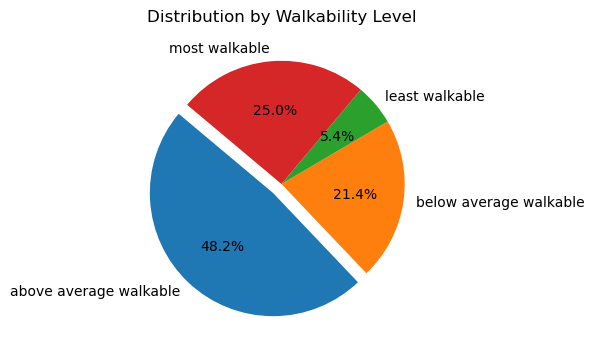

In [67]:
# Group by "levels of walkability"
walkability_groups = clean_database.groupby('levels of walkability')

# Calculate the total population for each walkability level
total_pop_by_walkability = walkability_groups['CBSA_POP'].sum()

# Identify the index of the largest value
explode_index = total_pop_by_walkability.idxmax()

# Create an explode list to highlight the largest piece
explode = [0.1 if walkability == explode_index else 0 for walkability in total_pop_by_walkability.index]

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(total_pop_by_walkability, labels=total_pop_by_walkability.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution by Walkability Level')
plt.show()

### State Summary

In [16]:
# Total CBSAs
total_CBSA = len(clean_database["CBSA_Name"].value_counts())
total_CBSA

27

In [17]:
# Total NY Population surveyed
total_Population = clean_database["CBSA_POP"].unique().sum()
print(f"{total_Population:,}")

25,865,870


In [18]:
# Total working population
total_Work_Population = clean_database["CBSA_WRK"].unique().sum()
print(f"{total_Work_Population:,}")

11,863,463


In [19]:
# Average Walkability Index
AVG_Walkability =clean_database["NatWalkInd"].mean()
# AVG_Walkability='{:,.2f}'.format(AVG_Walkability)
print(f"{AVG_Walkability:,.2f}")

11.55


In [20]:
# Percentage of High income

pop_high_income= clean_database["R_HiWageWk"].sum()

high_income_percentage =(pop_high_income/total_Work_Population)

print("{:.2%}".format(high_income_percentage))

49.83%


In [21]:
# Percentage of Medium income

pop_med_income= clean_database["R_MedWageWk"].sum()

medium_income_percentage =pop_med_income/total_Work_Population
print("{:.2%}".format(medium_income_percentage))

28.68%


In [22]:
# Percentage of Low income

pop_low_income= clean_database["R_LowWageWk"].sum()

low_income_percentage =pop_low_income/total_Work_Population
print("{:.2%}".format(low_income_percentage))

21.49%


In [23]:
NY_summary = pd.DataFrame({'CBSA Count':total_CBSA,'Total Population':total_Population,
                                 'Total Working Population':total_Work_Population,
                                  'Average Walkability Index':AVG_Walkability,
                                    'Percentage of High Income':high_income_percentage,
                                    'Percentage of Medium Income':medium_income_percentage,
                                   'Percentage of Low Income':low_income_percentage
                          
                          },index=[0])

# # Formatting
NY_summary['Total Population'] = NY_summary['Total Population'].map("{:,}".format)
NY_summary['Total Working Population'] = NY_summary['Total Working Population'].map("{:,}".format)
NY_summary['Average Walkability Index'] = NY_summary['Average Walkability Index'].map("{:.2f}".format)
NY_summary['Percentage of High Income'] = NY_summary['Percentage of High Income'].map(lambda x: "{:.2%}".format(x))
NY_summary['Percentage of Medium Income'] = NY_summary['Percentage of Medium Income'].map(lambda x: "{:.2%}".format(x))
NY_summary['Percentage of Low Income'] = NY_summary['Percentage of Low Income'].map(lambda x: "{:.2%}".format(x))


### Overall Summary

In [24]:
# Display the DataFrame
NY_summary

,CBSA Count,Total Population,Total Working Population,Average Walkability Index,Percentage of High Income,Percentage of Medium Income,Percentage of Low Income
0,27,"25,865,870","11,863,463",11.55,49.83%,28.68%,21.49%


### Consolidation Analysis

In [59]:
grp_by_summary = clean_database.groupby('CBSA_Name')

# Unifying unique values
max_columns = ['CBSA_POP','CBSA_EMP','CBSA_WRK','Perc_Local_wrk','levels of walkability']
grp_by_max = grp_by_summary.max()[max_columns]

#Suming Unique Columns
sum_columns= ['R_LowWageWk','R_MedWageWk','R_HiWageWk']
grp_by_sum = grp_by_summary.sum()[sum_columns]

#Finding Mean Columns
mean_columns= ['NatWalkInd']
grp_by_mean = grp_by_summary.first()[mean_columns]

#grouping all the individual columns
grp_by_final = pd.concat([grp_by_max, grp_by_sum, grp_by_mean], axis="columns")

grp_by_final.head()

,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,levels of walkability,R_LowWageWk,R_MedWageWk,R_HiWageWk,NatWalkInd
CBSA_Name,,,,,,,,,
"Albany-Schenectady-Troy, NY",880481,447103,419749,47.67,most walkable,93070,118712,207967,6.500000
"Amsterdam, NY",49426,18259,19904,40.27,least walkable,4703,7505,7696,2.833333
"Auburn, NY",77868,24921,34908,44.83,most walkable,8500,11576,14832,4.833333
"Batavia, NY",58112,21916,27630,47.55,least walkable,6633,9449,11548,7.166667
"Binghamton, NY",243447,100147,104003,42.72,most walkable,25373,36202,42428,8.166667


KeyError: "['levels of walkability'] not in index"

### Top 5 CBSA by NatWalkInd

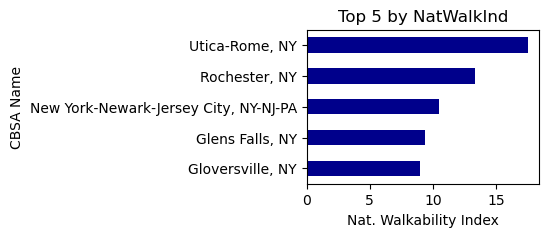

In [38]:
top_bottom_column = 'NatWalkInd'
grp_by_final_sorted = grp_by_final.sort_values(by=top_bottom_column, ascending=True)
top_5_wlk=grp_by_final_sorted.tail(5)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(3, 2))
top_5_wlk[top_bottom_column].plot(kind='barh', ax=ax, color='darkblue')
ax.set_title(f'Top 5 by {top_bottom_column}')
ax.set_xlabel('Nat. Walkability Index')
ax.set_ylabel('CBSA Name')
plt.show()

### Top 5 CBSA by CBSA Population

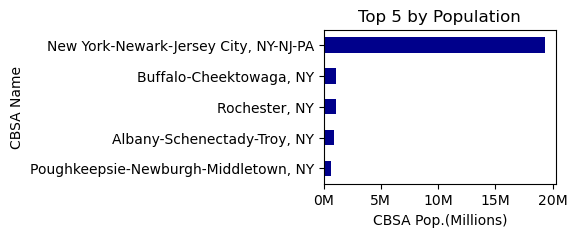

In [37]:
top_bottom_column = 'CBSA_POP'

grp_by_final_sorted = grp_by_final.sort_values(by=top_bottom_column, ascending=True)
top_5_pop=grp_by_final_sorted.tail(5)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(3,2))


# Define the function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Apply the formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
ax.xaxis.set_major_formatter(formatter)

top_5_pop[top_bottom_column].plot(kind='barh',ax=ax, color='darkblue')
ax.set_title(f'Top 5 by Population')
ax.set_xlabel('CBSA Pop.(Millions)')
ax.set_ylabel('CBSA Name')
plt.show()

### Bottom 5 CBSA by NatWalkInd

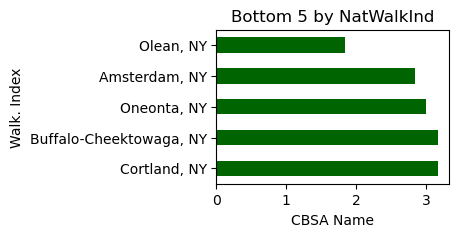

In [49]:
top_bottom_column = 'NatWalkInd'
grp_by_final_sorted = grp_by_final.sort_values(by=top_bottom_column, ascending=False)
bottom_5_wlk=grp_by_final_sorted.tail(5)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(3, 2))
bottom_5_wlk[top_bottom_column].plot(kind='barh', ax=ax, color='darkgreen')
ax.set_title(f'Bottom 5 by {top_bottom_column}')
ax.set_ylabel('Walk. Index')
ax.set_xlabel('CBSA Name')
plt.show()

### Bottom 5 CBSA by CBSA Population

#### **NOTE**: Observed a skewerness on data after plotting TOP 5 by Population.

- Decided to standardize the population within the data

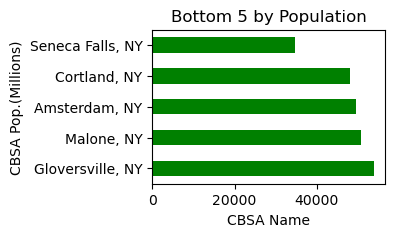

In [57]:
top_bottom_column = 'CBSA_POP'

grp_by_final_sorted = grp_by_final.sort_values(by=top_bottom_column, ascending=False)
bottom_5_pop=grp_by_final_sorted.tail(5)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(3, 2))

bottom_5_pop[top_bottom_column].plot(kind='barh',ax=ax, color='green')
ax.set_title(f'Bottom 5 by Population')
ax.set_ylabel('CBSA Pop.(Millions)')
ax.set_xlabel('CBSA Name')
plt.show()

In [30]:
# Create function to properly scale the dataset, preventing skewerness

# Define a scaling function
def min_max_scaling(column):
    min_value = column.min()
    max_value = column.max()
    return (column - min_value) / (max_value - min_value)

# Apply the scaling function to both columns
clean_database['Scaled_CBSA_POP'] = min_max_scaling(clean_database['CBSA_POP'])
clean_database

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Local_Workers_%_Range,Ac_Total,Ac_Unpr,P_WrkAge,...,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd,levels of walkability,Scaled_CBSA_POP
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,51.444490,50.313740,0.705,...,120,181,11,26.791886,0.218628,962.92,661739,10.500000,below average walkable,1.0
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,1025.230008,960.425575,0.560,...,128,653,282,1.632610,0.293620,944.15,140212,9.500000,below average walkable,1.0
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,1423.857411,1252.374073,0.557,...,217,473,4012,1.484381,3.203516,839.54,158876,13.000000,above average walkable,1.0
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,485.497632,433.369860,0.630,...,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333,below average walkable,1.0
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,148.564674,147.595085,0.626,...,91,315,194,4.674952,1.314407,968.29,278458,14.666667,above average walkable,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,7356.423984,6764.490215,0.591,...,140,189,190,0.134970,0.028088,-99999.00,4940,7.000000,below average walkable,1.0
19822,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,7941.309931,7254.276913,0.677,...,112,142,32,0.177275,0.004411,-99999.00,249,3.833333,least walkable,1.0
19823,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,5142.746758,4844.003689,0.573,...,270,322,62,0.315029,0.012799,-99999.00,690,5.666667,least walkable,1.0
19824,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,75%-100%,2440.629186,2323.255450,0.629,...,296,331,45,0.796296,0.019369,-99999.00,992,3.833333,least walkable,1.0


In [31]:
# Saving filtered_database to CSV file to future work
# Specify the path where you want to save the CSV file
csv_file_path = 'filtered_database.csv'

# Save the DataFrame to a CSV file
filtered_database.to_csv(csv_file_path, index=False)